In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd

In [2]:
books = pd.read_csv("books.csv")
books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.78156E+12,eng,512,156,20,12/21/2004,Da Capo Press,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78014E+12,eng,635,783,56,12/1/1988,Penguin Books,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78014E+12,eng,415,820,95,8/1/1993,Penguin Books,NaN
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.78006E+12,eng,434,769,139,2/27/2007,Ecco,NaN


In [3]:
#finding null values
books.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
  num_pages               0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11124
dtype: int64

In [4]:
#deleting Unnamed column
books = books.drop(columns="Unnamed: 12")

In [5]:
#removing co-authors
authors = []
for a in books["authors"].str.split("/"):
    authors.append(a[0])
books["authors"] = authors

#renaming num_pages to remove whitespace
books = books.rename(columns={"  num_pages" : "num_pages"})

In [6]:
books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann,4.06,1560254416,9.78156E+12,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78014E+12,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78014E+12,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.78006E+12,eng,434,769,139,2/27/2007,Ecco


In [7]:
#changing strings to ints
books["average_rating"] = pd.to_numeric(books["average_rating"], downcast="float", errors="coerce")
books["num_pages"] = pd.to_numeric(books["num_pages"], downcast="integer", errors="coerce")
books["ratings_count"] = pd.to_numeric(books["ratings_count"], downcast="integer", errors="coerce")
books["text_reviews_count"] = pd.to_numeric(books["text_reviews_count"], downcast="integer", errors="coerce")

#average rating has to be at least 1, and there has to be at least one rating count
books = books[books["average_rating"] > 0]
books = books[books['ratings_count'] > 0]

#resetting the row index 
books.reset_index(drop=True, inplace=True)
books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,439785960,9.78044E+12,eng,652.0,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9.78044E+12,eng,870.0,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352.0,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9.78044E+12,eng,435.0,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,439682584,9.78044E+12,eng,2690.0,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11039,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann,4.06,1560254416,9.78156E+12,eng,512.0,156,20,12/21/2004,Da Capo Press
11040,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78014E+12,eng,635.0,783,56,12/1/1988,Penguin Books
11041,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78014E+12,eng,415.0,820,95,8/1/1993,Penguin Books
11042,45639,Poor People,William T. Vollmann,3.72,60878827,9.78006E+12,eng,434.0,769,139,2/27/2007,Ecco


In [8]:
#calculating mean, median, std, and var of average_rating, num_pages, ratings_count, and text_reviews_count
avgRating = books["average_rating"]
print('Average Rating')
print('Mean: {:>14.4}'.format(avgRating.mean()), '\nMedian: {:>11.4}'.format(avgRating.median()), '\nVariance:  {:>11.4}'.format(avgRating.var()), '\nStandard Dev: {:>7.4}'.format(avgRating.std()))

numPages = books["num_pages"]
print('\nNumber of Pages')
print('Mean: {:>14.4}'.format(numPages.mean()), '\nMedian: {:>12.4}'.format(numPages.median()), '\nVariance:      {:>}'.format(numPages.var()), '\nStandard Dev: {:>6.4}'.format(numPages.std()))

ratings = books["ratings_count"]
print('\nNumber of Ratings')
print('Mean: {:>27}'.format(ratings.mean()), '\nMedian: {:>12.4}'.format(ratings.median()), '\nVariance:  {:>22}'.format(ratings.var()), '\nStandard Dev: {:>19}'.format(ratings.std()))

textReviews = books["text_reviews_count"]
print('\nNumber of Reviews')
print('Mean: {:>26}'.format(textReviews.mean()), '\nMedian: {:>11.4}'.format(textReviews.median()), '\nVariance: {:>20}'.format(textReviews.var()), '\nStandard Dev: {:>19}'.format(textReviews.std()))

Average Rating
Mean:          3.943 
Median:        3.96 
Variance:      0.08715 
Standard Dev:  0.2952

Number of Pages
Mean:          336.8 
Median:        300.0 
Variance:      58077.304515754215 
Standard Dev:  241.0

Number of Ratings
Mean:          18071.202462875768 
Median:        765.5 
Variance:      12744279295.450085 
Standard Dev:  112890.56335872403

Number of Reviews
Mean:          545.9258420862006 
Median:        48.0 
Variance:      6684345.3688549 
Standard Dev:  2585.4100968424527


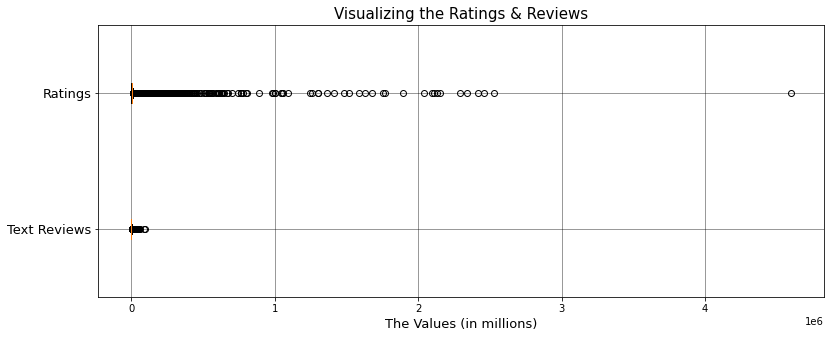

In [9]:
#reviews and ratings boxplot together
#x axis is in the millions
plt.figure(figsize=(13,5))
plt.boxplot([textReviews, ratings], vert=False)
plt.grid(alpha=0.5, c="k")
plt.yticks([1,2], ["Text Reviews", "Ratings"], fontsize="13")
plt.xlabel("The Values (in millions)", fontsize="13")
plt.title("Visualizing the Ratings & Reviews", fontsize="15")
plt.show()

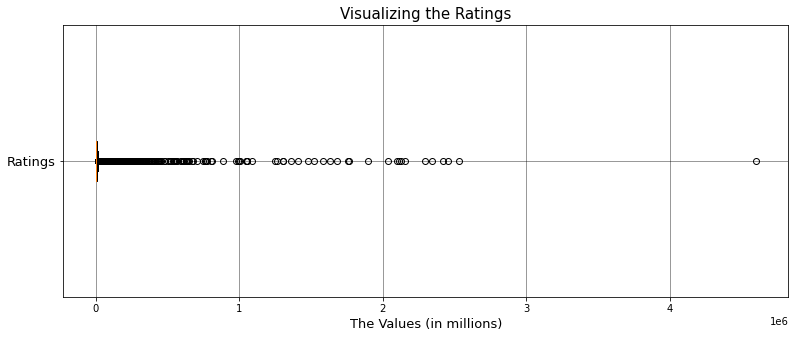

In [10]:
#just the ratings, again x-axis is in the millions
plt.figure(figsize=(13,5))
plt.boxplot(ratings, vert=False)
plt.grid(alpha=0.5, c="k")
plt.yticks([1], ["Ratings"], fontsize="13")
plt.xlabel("The Values (in millions)", fontsize="13")
plt.title("Visualizing the Ratings", fontsize="15")
plt.show()

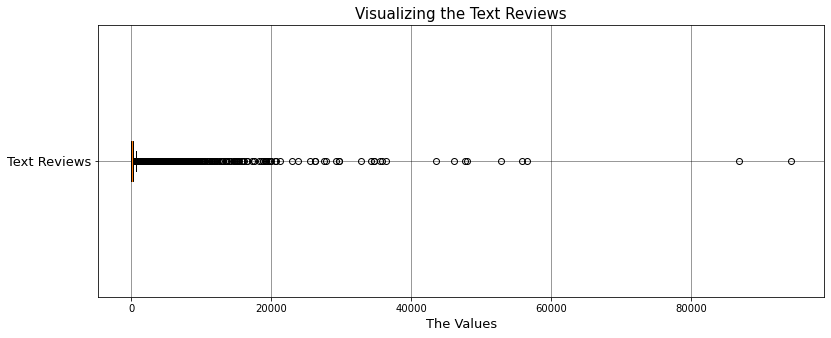

In [11]:
#just the reviews
plt.figure(figsize=(13,5))
plt.boxplot(textReviews, vert=False)
plt.grid(alpha=0.5, c="k")
plt.yticks([1], ["Text Reviews"], fontsize="13")
plt.xlabel("The Values", fontsize="13")
plt.title("Visualizing the Text Reviews", fontsize="15")
plt.show()

In [12]:
#looking at the ratings
#multiplied by 0.1 so you can see the data, otherwise it would be in scientific notation
#imagine the decimal point is one space to the right
(ratings*0.1).describe()

count     11044.000000
mean       1807.120246
std       11289.056336
min           0.100000
25%          11.000000
50%          76.550000
75%         506.125000
max      459766.600000
Name: ratings_count, dtype: float64

In [13]:
#looking at the reviews
textReviews.describe()

count    11044.000000
mean       545.925842
std       2585.410097
min          0.000000
25%          9.000000
50%         48.000000
75%        241.250000
max      94265.000000
Name: text_reviews_count, dtype: float64

Text(0, 0.5, 'Length of Pages')

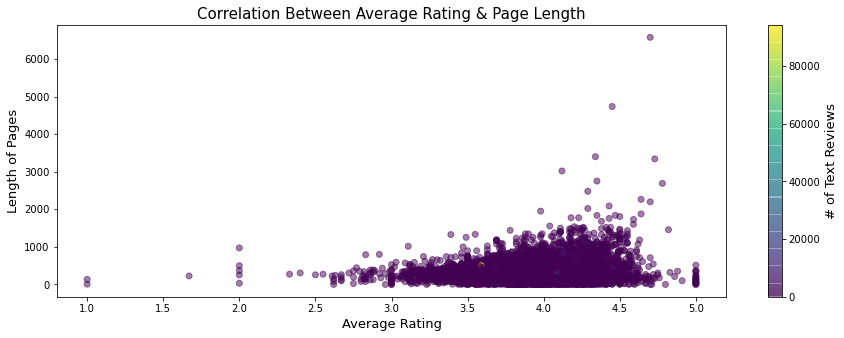

In [14]:
#rating & page length with number of reviews as color
plt.figure(figsize=(15,5))
plt.scatter(avgRating, numPages, c=textReviews, cmap="viridis", alpha=0.5)
cb = plt.colorbar()
cb.set_label('# of Text Reviews', fontsize="13")
plt.title("Correlation Between Average Rating & Page Length", fontsize="15")
plt.xlabel("Average Rating", fontsize="13")
plt.ylabel("Length of Pages", fontsize="13")

In [15]:
#getting the most common authors included in the dataset
authD = {}

for a in books["authors"]:
    if a in authD:
        authD[a] += 1
    else:
        authD[a] = 1

authName = []
authFreq = []

for i in authD:
    authName.append(i)
    authFreq.append(authD[i])

#sort the items in authFreq based on the frequency
for k in range(0, len(authFreq)):
    for l in range(k+1, len(authFreq)):
        
        if authFreq[k] > authFreq[l]:
            continue
        
        #if frequency is the same, then sort them alphabetically
        elif authFreq[k] == authFreq[l]:
            if authName[k] > authName[l]:
                oldWord = authName[k]
                authName[k] = authName[l]
                authName[l] = oldWord
            else:
                continue
        else:
            oldNum = authFreq[k]
            authFreq[k] = authFreq[l]
            authFreq[l] = oldNum
            
            oldW = authName[k]
            authName[k] = authName[l]
            authName[l] = oldW

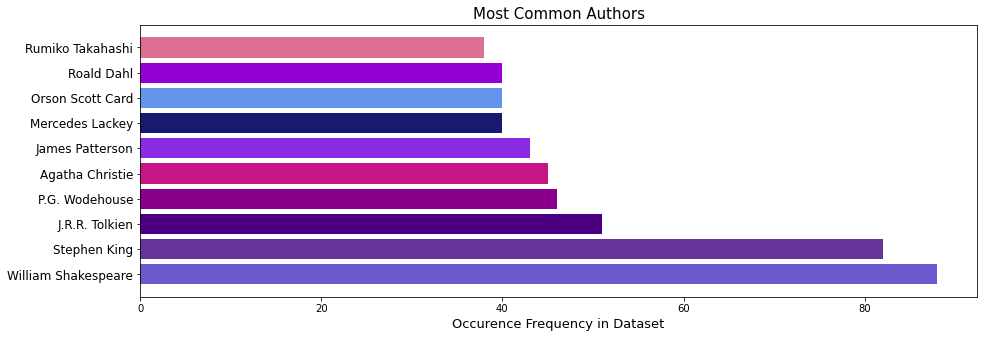

In [16]:
#most common authors based on the frequency of their occurence in the dataset
plt.figure(figsize=(15,5))
plt.title("Most Common Authors", fontsize="15")
plt.xlabel("Occurence Frequency in Dataset", fontsize="13")
plt.barh(authName[:10], authFreq[:10], color=["slateblue", "rebeccapurple", "indigo", "darkmagenta", "mediumvioletred", "blueviolet", "midnightblue", "cornflowerblue", "darkviolet", "palevioletred"])
plt.yticks(fontsize="12")
plt.show()

In [17]:
#calculating popularity: ratings/avg rating
books1 = books.assign(popularity=pd.Series((books["ratings_count"]/books["average_rating"])).values)
authAvgR = books1.sort_values(by="popularity", ascending=False).iloc[:10]

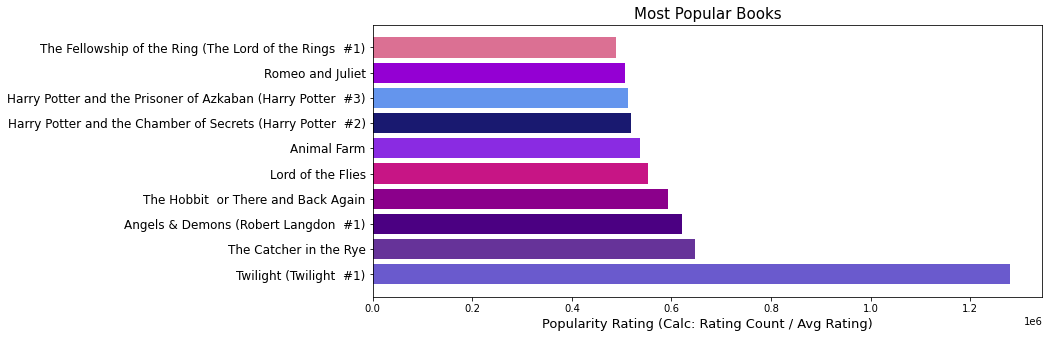

In [18]:
#the most popular titles in the dataset
plt.figure(figsize=(12,5))
plt.title("Most Popular Books", fontsize="15")
plt.xlabel("Popularity Rating (Calc: Rating Count / Avg Rating)", fontsize="13")
plt.barh(authAvgR["title"], authAvgR["popularity"], color=["slateblue", "rebeccapurple", "indigo", "darkmagenta", "mediumvioletred", "blueviolet", "midnightblue", "cornflowerblue", "darkviolet", "palevioletred"])
plt.yticks(fontsize="12")
plt.show()

In [19]:
#looking at the ratings vs the reviews

#split the data into three to help visualize it better
books2 = books.sort_values(by='ratings_count')
ratingsP1 = books2['ratings_count'][:5522]
ratingsP2 = books2['ratings_count'][5522:9203]
ratingsP3 = books2['ratings_count'][9203:]

textRP1 = books2['text_reviews_count'][:5522]
textRP2 = books2['text_reviews_count'][5522:9203]
textRP3 = books2['text_reviews_count'][9203:]

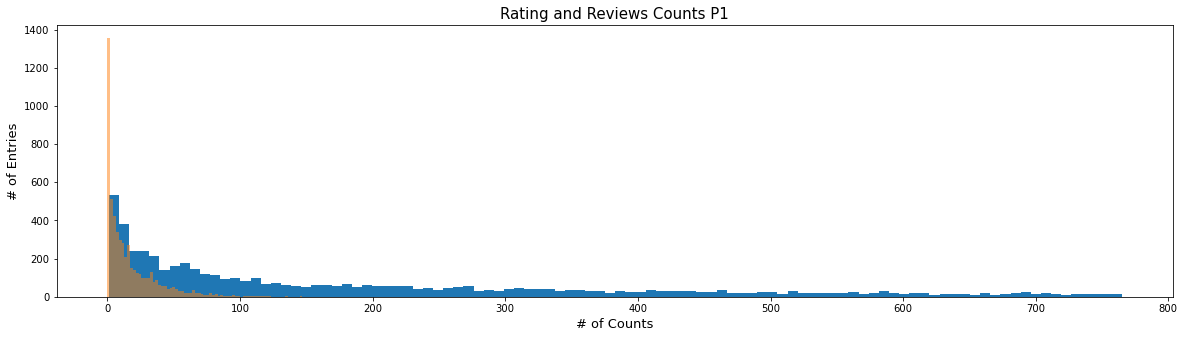

In [22]:
#first set of data
plt.figure(figsize=(20,5))
plt.hist(ratingsP1, 100)
plt.hist(textRP1, 100, alpha=0.5)
plt.title("Rating and Reviews Counts P1", fontsize="15")
plt.xlabel("# of Counts", fontsize="13")
plt.ylabel("# of Entries", fontsize="13")
plt.show()

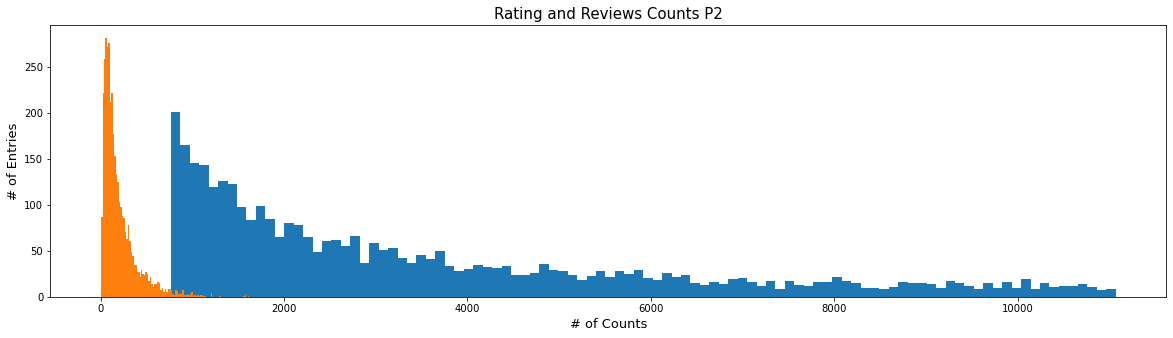

In [21]:
#second set of data
plt.figure(figsize=(20,5))
plt.hist(ratingsP2, 100)
plt.hist(textRP2, 100)
plt.title("Rating and Reviews Counts P2", fontsize="15")
plt.xlabel("# of Counts", fontsize="13")
plt.ylabel("# of Entries", fontsize="13")
plt.show()

In [26]:
#this is the first entry for graph P2 above
#as you can see, the ratings count is 766, which would be the start of the blue graph
#the text reviews count is really small in comparison at 47,
#which would be the start of the orange graph
books2.iloc[5522]

bookID                                   3042
title                 Knowledge And Decisions
authors                         Thomas Sowell
average_rating                           4.39
isbn                                465037380
isbn13                            9.78047E+12
language_code                             eng
num_pages                               422.0
ratings_count                             766
text_reviews_count                         47
publication_date                    10/4/1996
publisher                         Basic Books
Name: 914, dtype: object

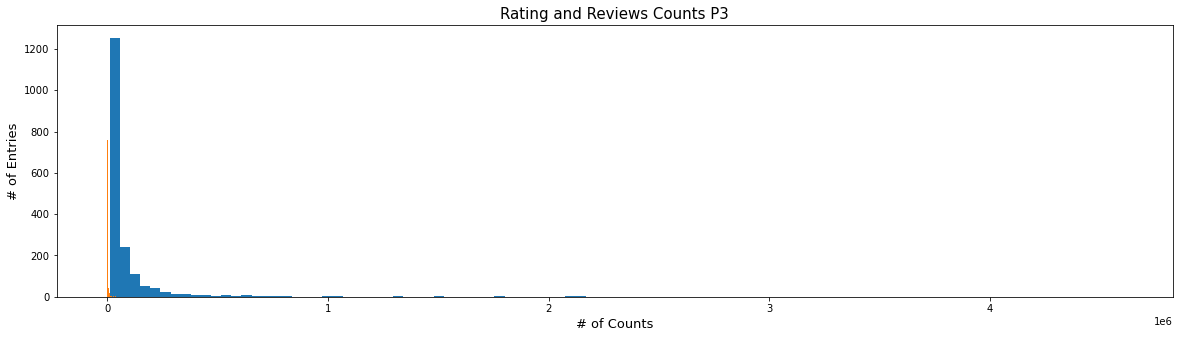

In [29]:
#third set of data
plt.figure(figsize=(20,5))
plt.hist(ratingsP3, 100)
plt.hist(textRP3, 100)
plt.title("Rating and Reviews Counts P3", fontsize="15")
plt.xlabel("# of Counts", fontsize="13")
plt.ylabel("# of Entries", fontsize="13")
plt.show()

In [30]:
#this is the first entry for graph P3 above
#as you can see, the ratings count is 11070, which would be the start of the blue graph
#the text reviews count is really small in comparison at 150,
#which would be the start of the barely visible orange graph
books2.iloc[9203]

bookID                                                            26054
title                 The MacGregors: Serena & Caine (The MacGregors...
authors                                                    Nora Roberts
average_rating                                                     4.09
isbn                                                          373285132
isbn13                                                      9.78037E+12
language_code                                                       eng
num_pages                                                         441.0
ratings_count                                                     11070
text_reviews_count                                                  150
publication_date                                              1/28/2006
publisher                                                          Mira
Name: 6867, dtype: object

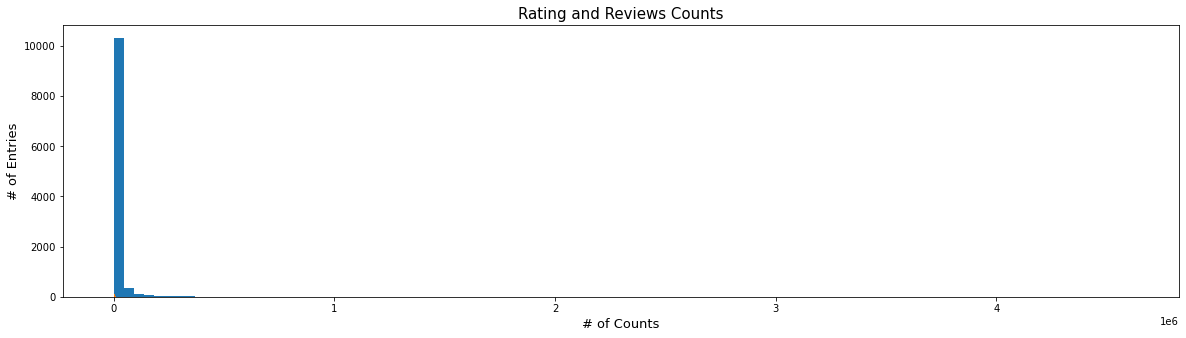

In [31]:
#what it would look like if the data hadn't been split (orange is almost non-existent)
plt.figure(figsize=(20,5))
plt.hist(ratings, 100)
plt.hist(textReviews, 100)
plt.title("Rating and Reviews Counts", fontsize="15")
plt.xlabel("# of Counts", fontsize="13")
plt.ylabel("# of Entries", fontsize="13")
plt.show()

________________________________________________________________________________________________________________________
The graphs and calculations below were ones that I would have included as well, but they would make the report too long.
I've included them here just for some examples of extra analysis that could be done with this data.

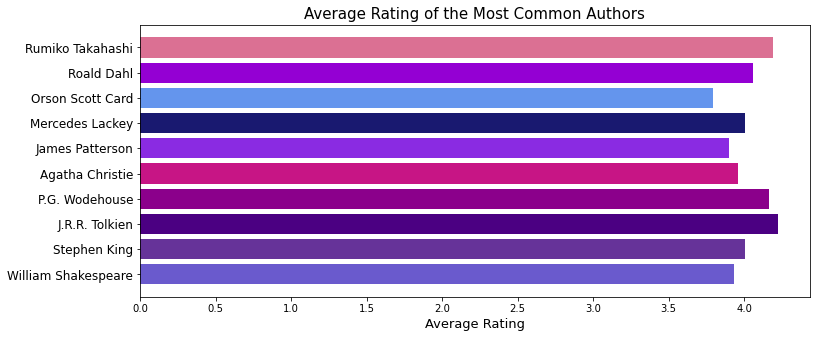

In [32]:
#extra graphs not included in report
#determining the average rating of the top ten authors
#for each author: taking the mean of the average rating of all their books
authRating = []
for a in authName[:10]:
    authRating.append(books[books["authors"] == a]["average_rating"].sum() / books[books["authors"] == a].shape[0])
    
plt.figure(figsize=(12,5))
plt.title("Average Rating of the Most Common Authors", fontsize="15")
plt.xlabel("Average Rating", fontsize="13")
plt.barh(authName[:10],authRating, color=["slateblue", "rebeccapurple", "indigo", "darkmagenta", "mediumvioletred", "blueviolet", "midnightblue", "cornflowerblue", "darkviolet", "palevioletred"])
plt.yticks(fontsize="12")
plt.show()

Text(0, 0.5, 'Average Rating')

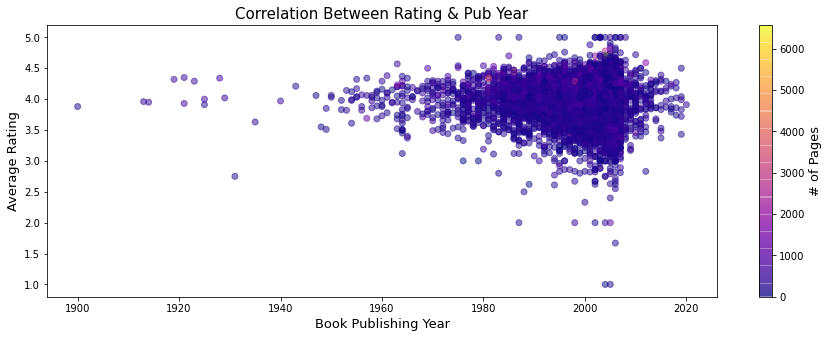

In [33]:
#creating a column for just the publication year
books3 = books.assign(pub_year=pd.Series(books["publication_date"].str.slice(-4)).values)
books3['pub_year'] = pd.to_numeric(books3["pub_year"], downcast="integer", errors="coerce")

#extra graphs not included in report
#the correlation between ratings and publication years
plt.figure(figsize=(15,5))
plt.scatter(books3["pub_year"], books3['average_rating'], c=books3["num_pages"], cmap="plasma", alpha=0.5)
cb= plt.colorbar()
cb.set_label('# of Pages', fontsize="13")
plt.title("Correlation Between Rating & Pub Year", fontsize="15")
plt.xlabel("Book Publishing Year", fontsize="13")
plt.ylabel("Average Rating", fontsize="13")

Text(0, 0.5, 'Number of Reviews')

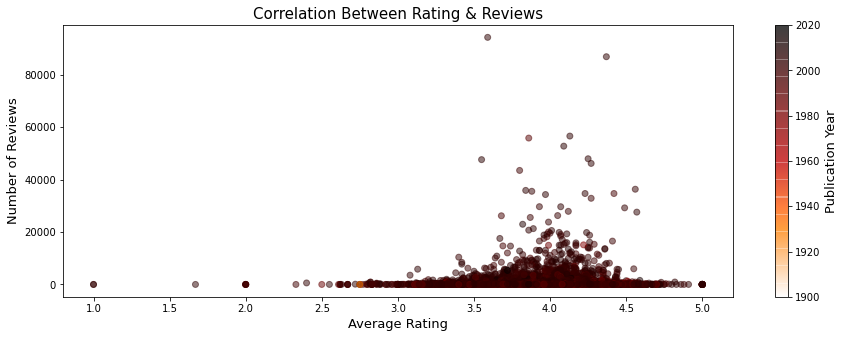

In [34]:
#extra graphs not included in report
#the correlation between number of reviews vs the average rating
plt.figure(figsize=(15,5))
plt.scatter(avgRating, textReviews, c=books3["pub_year"], cmap="gist_heat_r", alpha=0.5)
cb= plt.colorbar()
cb.set_label('Publication Year', fontsize="13")
plt.title("Correlation Between Rating & Reviews", fontsize="15")
plt.xlabel("Average Rating", fontsize="13")
plt.ylabel("Number of Reviews", fontsize="13")